# Setup

Setup cells for running if Google Colab. Ignore if running locally.

In [1]:
!pip install fasttext

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2385855 sha256=1580e57e61fa6bb4e694e56c05d4659b8f90d8155eeaa2f05b83932abc94c760
  Stored in directory: /root/.cache/pip/wheels/9f/f0/04/caa82c912aee89ce76358ff954f3f0729b7577c8ff23a292e3
Successfully built fasttext


In [0]:
%load_ext autoreload
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.insert(1, 'drive/My Drive/iwt-wot/')

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Imports and Loading Pre-trained Word Embeddings

Make sure to change DRIVE_DIR in cell below based on the location of the iwt-wot folder

In [5]:
from wordEmbedding import Embedding

import random
from pathlib import Path
import math

import torch
import torch.optim as optim
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
random.seed(1)
print(device)

DRIVE_DIR = Path('drive/My Drive/iwt-wot/')

cuda


In [6]:
print('about to load embeddings')
embed = Embedding(DRIVE_DIR)

about to load embeddings
loading embedding model
loaded embedding model


# Sub-task 1

## Model 2

Training of model 2 for sub-task 1

In [0]:
from model import Model25 as Model2
from preprocessing import model2preprocessing, TASK_1, EXTRA_TRAIN_TASK_1

In [8]:
print('about to load data')
training_data = model2preprocessing([DRIVE_DIR / TASK_1 / 'train.csv', DRIVE_DIR / EXTRA_TRAIN_TASK_1])
print('loaded training data')
val_data = model2preprocessing([DRIVE_DIR / TASK_1 / 'dev.csv'])
print('loaded val data')

about to load data
loaded training data
loaded val data


In [0]:
def train(epoch, model, loss_function, optimizer):
    train_loss = 0
    train_examples = 0
    square_error = 0

    for inputData, score in training_data:
        model.zero_grad()

        embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
        score_tensor = torch.tensor([score]).to(device)

        score_output = model(embedding)

        loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
        train_loss += loss.item()

        square_error += (score_output.item() - score)**2

        loss.backward()
        optimizer.step()

        train_examples += 1

    train_rmse = math.sqrt(square_error / train_examples)
    avg_train_loss = train_loss / train_examples
    avg_val_loss, val_rmse = evaluate(model, loss_function, optimizer)

    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\tAvg Val Loss: {:.4f}\t Train RMSE: {:.4f}\t Val RMSE: {:.4f}".format(epoch,
                                                                      EPOCHS,
                                                                      avg_train_loss,
                                                                      avg_val_loss,
                                                                      train_rmse,
                                                                      val_rmse))
    
    return train_rmse, val_rmse

In [0]:
def evaluate(model, loss_function, optimizer):
  # returns:: avg_val_loss (float)
  # returns:: val_accuracy (float)
    val_loss = 0
    square_error = 0
    val_examples = 0
    with torch.no_grad():
        for inputData, score in val_data:
            embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
            score_tensor = torch.tensor([score]).to(device)
            score_output = model(embedding)

            loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
            val_loss += loss.item()
            square_error += (score_output.item() - score)**2

            val_examples += 1

    rmse = math.sqrt(square_error / val_examples)
    avg_val_loss = val_loss / val_examples
    return avg_val_loss, rmse

In [16]:
HIDDEN_DIM = 6
LEARNING_RATE = 0.2
LSTM_LAYERS = 1
DROPOUT = 0
EPOCHS = 30

print(device)
model2 = Model2(HIDDEN_DIM, LSTM_LAYERS, DROPOUT).to(device)
print(f'model loaded to device')
optimizer = torch.optim.SGD(model2.parameters(), lr=LEARNING_RATE)

loss_function = nn.MSELoss()

t_rmses = []
v_rmses = []

for epoch in range(1, EPOCHS + 1):
    tr, vr = train(epoch, model2, loss_function, optimizer)
    t_rmses.append(tr)
    v_rmses.append(vr)

cuda
model loaded to device
Epoch: 1/30	Avg Train Loss: 0.3870	Avg Val Loss: 0.3685	 Train RMSE: 0.6221	 Val RMSE: 0.6070
Epoch: 2/30	Avg Train Loss: 0.3800	Avg Val Loss: 0.3576	 Train RMSE: 0.6164	 Val RMSE: 0.5980
Epoch: 3/30	Avg Train Loss: 0.3690	Avg Val Loss: 0.3549	 Train RMSE: 0.6074	 Val RMSE: 0.5957
Epoch: 4/30	Avg Train Loss: 0.3581	Avg Val Loss: 0.3470	 Train RMSE: 0.5984	 Val RMSE: 0.5891
Epoch: 5/30	Avg Train Loss: 0.3498	Avg Val Loss: 0.3429	 Train RMSE: 0.5914	 Val RMSE: 0.5856
Epoch: 6/30	Avg Train Loss: 0.3424	Avg Val Loss: 0.3409	 Train RMSE: 0.5852	 Val RMSE: 0.5839
Epoch: 7/30	Avg Train Loss: 0.3364	Avg Val Loss: 0.3420	 Train RMSE: 0.5800	 Val RMSE: 0.5848
Epoch: 8/30	Avg Train Loss: 0.3309	Avg Val Loss: 0.3427	 Train RMSE: 0.5752	 Val RMSE: 0.5854
Epoch: 9/30	Avg Train Loss: 0.3259	Avg Val Loss: 0.3413	 Train RMSE: 0.5709	 Val RMSE: 0.5842
Epoch: 10/30	Avg Train Loss: 0.3212	Avg Val Loss: 0.3400	 Train RMSE: 0.5667	 Val RMSE: 0.5831
Epoch: 11/30	Avg Train Loss: 0.

KeyboardInterrupt: ignored

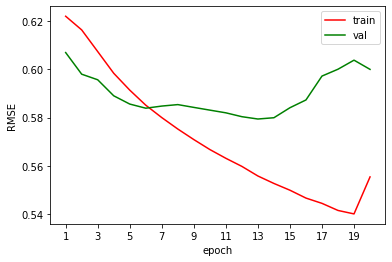

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(len(t_rmses)), t_rmses, 'r', label='train')
plt.plot(range(len(v_rmses)), v_rmses, 'g', label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.xticks(np.arange(1, 21, 2)-1, np.arange(1, 21, 2))

plt.savefig('overfitting.png')
plt.show()

## Model 1

Training of model 1 for sub-task 1 (also for sub-task 2, since we simply create a model for sub-task 2 directly from Model 1 for sub-task 2)

In [0]:
from model import Model25 as Model1
from preprocessing import model1preprocessing, TASK_1, EXTRA_TRAIN_TASK_1

In [71]:
print('about to load data')
training_data = model1preprocessing([DRIVE_DIR / TASK_1 / 'train.csv', DRIVE_DIR / EXTRA_TRAIN_TASK_1])
print('loaded training data')
val_data = model1preprocessing([DRIVE_DIR / TASK_1 / 'dev.csv'])
print('loaded val data')

about to load data
loaded training data
loaded val data


In [0]:
def train(epoch, model, loss_function, optimizer):
    train_loss = 0
    train_examples = 0
    square_error = 0

    for inputData, score in training_data[1::2]:
        model.zero_grad()

        embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
        score_tensor = torch.tensor([score]).to(device)

        score_output = model(embedding)
        
        loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
        train_loss += loss.item()
        square_error += (score_output.item() - score)**2

        loss.backward()
        optimizer.step()

        train_examples += 1

    train_rmse = math.sqrt(square_error / train_examples)
    avg_train_loss = train_loss / train_examples
    avg_val_loss, val_rmse = evaluate(model, loss_function, optimizer)

    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\tAvg Val Loss: {:.4f}\t Train RMSE: {:.4f}\t Val RMSE: {:.4f}".format(epoch,
                                                                      EPOCHS,
                                                                      avg_train_loss,
                                                                      avg_val_loss,
                                                                      train_rmse,
                                                                      val_rmse))

In [0]:
def evaluate(model, loss_function, optimizer):
  # returns:: avg_val_loss (float)
  # returns:: val_accuracy (float)
    val_loss = 0
    square_error = 0
    val_examples = 0
    with torch.no_grad():
        for inputData, score in val_data[1::2]:
            embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
            score_tensor = torch.tensor([score]).to(device)

            score_output = model(embedding)

            loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
            val_loss += loss.item()

            square_error += (score_output.item() - score)**2

            val_examples += 1

    rmse = math.sqrt(square_error / val_examples)
    avg_val_loss = val_loss / val_examples
    return avg_val_loss, rmse

In [74]:
HIDDEN_DIM = 6
LEARNING_RATE = 0.18
LSTM_LAYERS = 1
DROPOUT = 0
EPOCHS = 30

print(device)
model1 = Model1(HIDDEN_DIM, LSTM_LAYERS, DROPOUT).to(device)
print(f'model loaded to device')
optimizer = torch.optim.SGD(model1.parameters(), lr=LEARNING_RATE)

loss_function = nn.MSELoss()


for epoch in range(1, EPOCHS + 1):
    train(epoch, model1, loss_function, optimizer)

cuda
model loaded to device
Epoch: 1/30	Avg Train Loss: 0.3783	Avg Val Loss: 0.3814	 Train RMSE: 0.6151	 Val RMSE: 0.6176
Epoch: 2/30	Avg Train Loss: 0.3690	Avg Val Loss: 0.3673	 Train RMSE: 0.6074	 Val RMSE: 0.6060


KeyboardInterrupt: ignored

## Model 3

Training for model 3 for sub-task 1

In [0]:
from model import Model3
from preprocessing import model3preprocessing, TASK_1, EXTRA_TRAIN_TASK_1

In [45]:
print('about to load data')
training_data = model3preprocessing([DRIVE_DIR / TASK_1 / 'train.csv', DRIVE_DIR / EXTRA_TRAIN_TASK_1])
print('loaded training data')
val_data = model3preprocessing([DRIVE_DIR / TASK_1 / 'dev.csv'])
print('loaded val data')

about to load data
loaded training data
loaded val data


In [0]:
def train(epoch, model, loss_function, optimizer):
    train_loss = 0
    train_examples = 0
    square_error = 0

    for originalSent, newSent, score in training_data:
        model.zero_grad()

        embedding1 = torch.tensor(embed.embed_sentence(originalSent)).to(device)
        embedding2 = torch.tensor(embed.embed_sentence(newSent)).to(device)
        score_tensor = torch.tensor([score]).to(device)

        score_output = model(embedding1, embedding2)
        
        loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
        train_loss += loss.item()

        square_error += (score_output.item() - score)**2

        loss.backward()
        optimizer.step()

        train_examples += 1

    train_rmse = math.sqrt(square_error / train_examples)
    avg_train_loss = train_loss / train_examples
    avg_val_loss, val_rmse = evaluate(model, loss_function, optimizer)

    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\tAvg Val Loss: {:.4f}\t Train RMSE: {:.4f}\t Val RMSE: {:.4f}".format(epoch,
                                                                      EPOCHS,
                                                                      avg_train_loss,
                                                                      avg_val_loss,
                                                                      train_rmse,
                                                                      val_rmse))

In [0]:
def evaluate(model, loss_function, optimizer):
  # returns:: avg_val_loss (float)
  # returns:: val_accuracy (float)
    val_loss = 0
    square_error = 0
    val_examples = 0
    with torch.no_grad():
        for originalSent, newSent, score in val_data:
            embedding1 = torch.tensor(embed.embed_sentence(originalSent)).to(device)
            embedding2 = torch.tensor(embed.embed_sentence(newSent)).to(device)
            score_tensor = torch.tensor([score]).to(device)
            score_output = model(embedding1, embedding2)

            loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
            val_loss += loss.item()

            square_error += (score_output.item() - score)**2

            val_examples += 1

    rmse = math.sqrt(square_error / val_examples)
    avg_val_loss = val_loss / val_examples
    return avg_val_loss, rmse

In [49]:
HIDDEN_DIM = 3
LEARNING_RATE = 0.18
LSTM_LAYERS = 1
DROPOUT = 0
EPOCHS = 30

print(device)
model3 = Model3(HIDDEN_DIM, LSTM_LAYERS, DROPOUT).to(device)
print(f'model loaded to device')
optimizer = torch.optim.SGD(model3.parameters(), lr=LEARNING_RATE)

loss_function = nn.MSELoss()


for epoch in range(1, EPOCHS + 1):
    train(epoch, model3, loss_function, optimizer)

cuda
model loaded to device
Epoch: 1/30	Avg Train Loss: 0.3801	Avg Val Loss: 0.3777	 Train RMSE: 0.6165	 Val RMSE: 0.6146
Epoch: 2/30	Avg Train Loss: 0.3755	Avg Val Loss: 0.3696	 Train RMSE: 0.6128	 Val RMSE: 0.6080
Epoch: 3/30	Avg Train Loss: 0.3677	Avg Val Loss: 0.3601	 Train RMSE: 0.6064	 Val RMSE: 0.6001
Epoch: 4/30	Avg Train Loss: 0.3545	Avg Val Loss: 0.3570	 Train RMSE: 0.5954	 Val RMSE: 0.5975
Epoch: 5/30	Avg Train Loss: 0.3433	Avg Val Loss: 0.3485	 Train RMSE: 0.5859	 Val RMSE: 0.5904
Epoch: 6/30	Avg Train Loss: 0.3337	Avg Val Loss: 0.3416	 Train RMSE: 0.5777	 Val RMSE: 0.5844
Epoch: 7/30	Avg Train Loss: 0.3262	Avg Val Loss: 0.3362	 Train RMSE: 0.5711	 Val RMSE: 0.5798
Epoch: 8/30	Avg Train Loss: 0.3203	Avg Val Loss: 0.3321	 Train RMSE: 0.5660	 Val RMSE: 0.5763
Epoch: 9/30	Avg Train Loss: 0.3155	Avg Val Loss: 0.3291	 Train RMSE: 0.5617	 Val RMSE: 0.5737
Epoch: 10/30	Avg Train Loss: 0.3115	Avg Val Loss: 0.3271	 Train RMSE: 0.5581	 Val RMSE: 0.5719
Epoch: 11/30	Avg Train Loss: 0.

KeyboardInterrupt: ignored

## Testing for sub-task 1

Below is our code for running models on the sub-task 1 test data.

### Model 1

In [0]:
from model import Model25 as Model1
from preprocessing import model1preprocessing, task2preprocessing, TASK_1, EXTRA_TRAIN_TASK_1, TASK_2

In [76]:
print('about to load data')
training_data = model1preprocessing([DRIVE_DIR / TASK_1 / 'train.csv', DRIVE_DIR / EXTRA_TRAIN_TASK_1, DRIVE_DIR / TASK_1 / 'dev.csv'])
print('loaded training data')
test_data = model1preprocessing([DRIVE_DIR / TASK_1 / 'test.csv'])
print('loaded test data')

about to load data
loaded training data
loaded test data


In [0]:
def train(epoch, model, loss_function, optimizer):
    train_loss = 0
    train_examples = 0
    square_error = 0

    for inputData, score in training_data[1::2]:
        model.zero_grad()

        embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
        score_tensor = torch.tensor([score]).to(device)

        score_output = model(embedding)
        
        loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
        train_loss += loss.item()

        square_error += (score_output.item() - score)**2

        loss.backward()
        optimizer.step()

        train_examples += 1

    train_rmse = math.sqrt(square_error / train_examples)
    avg_train_loss = train_loss / train_examples
    # avg_val_loss, val_rmse = evaluate(model, loss_function, optimizer)

    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\t Train RMSE: {:.4f}".format(epoch,
                                                                      EPOCHS,
                                                                      avg_train_loss,
                                                                      train_rmse,
                                                                      ))

In [78]:
HIDDEN_DIM = 6
LEARNING_RATE = 0.18
LSTM_LAYERS = 1
DROPOUT = 0
EPOCHS = 16

print(device)
model1 = Model1(HIDDEN_DIM, LSTM_LAYERS, DROPOUT).to(device)
print(f'model loaded to device')
optimizer = torch.optim.SGD(model1.parameters(), lr=LEARNING_RATE)

loss_function = nn.MSELoss()


for epoch in range(1, EPOCHS + 1):
    train(epoch, model1, loss_function, optimizer)

cuda
model loaded to device
Epoch: 1/16	Avg Train Loss: 0.3802	 Train RMSE: 0.6166
Epoch: 2/16	Avg Train Loss: 0.3718	 Train RMSE: 0.6098
Epoch: 3/16	Avg Train Loss: 0.3587	 Train RMSE: 0.5989
Epoch: 4/16	Avg Train Loss: 0.3468	 Train RMSE: 0.5889
Epoch: 5/16	Avg Train Loss: 0.3389	 Train RMSE: 0.5821
Epoch: 6/16	Avg Train Loss: 0.3332	 Train RMSE: 0.5773
Epoch: 7/16	Avg Train Loss: 0.3288	 Train RMSE: 0.5734
Epoch: 8/16	Avg Train Loss: 0.3249	 Train RMSE: 0.5700
Epoch: 9/16	Avg Train Loss: 0.3216	 Train RMSE: 0.5671
Epoch: 10/16	Avg Train Loss: 0.3185	 Train RMSE: 0.5643
Epoch: 11/16	Avg Train Loss: 0.3152	 Train RMSE: 0.5615
Epoch: 12/16	Avg Train Loss: 0.3124	 Train RMSE: 0.5589
Epoch: 13/16	Avg Train Loss: 0.3097	 Train RMSE: 0.5565
Epoch: 14/16	Avg Train Loss: 0.3067	 Train RMSE: 0.5538
Epoch: 15/16	Avg Train Loss: 0.3039	 Train RMSE: 0.5513
Epoch: 16/16	Avg Train Loss: 0.3011	 Train RMSE: 0.5487


In [0]:
def test_task1(model, loss_function, printErrors=False):
    test_loss = 0
    square_error = 0
    test_examples = 0
    errors = []
    guesses = []
    with torch.no_grad():
        for inputData, score in test_data[1::2]:
            embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
            score_tensor = torch.tensor([score]).to(device)

            score_output = model(embedding)

            loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
            test_loss += loss.item()

            square_error += (score_output.item() - score)**2

            errors.append(abs(score_output.item() - score))
            guesses.append(score_output.item())

            test_examples += 1

    rmse = math.sqrt(square_error / test_examples)
    avg_test_loss = test_loss / test_examples

    if printErrors:
      error_indices_sorted = sorted(range(len(errors)), key=lambda index: -errors[index])
      for i in range(10):
        index = error_indices_sorted[i]
        print('Number ' + str(i))
        print(errors[index])
        print(test_data[2*index][0])
        sentence, score = test_data[2 * index + 1]
        print(sentence)
        print(score)
        print(guesses[index])
        print()

    return avg_test_loss, rmse

In [82]:
test_task1(model1, loss_function)

(0.32591401598185044, 0.5708887965698799)

### Model 2

In [0]:
from model import Model25 as Model2
from preprocessing import model2preprocessing, TASK_1, EXTRA_TRAIN_TASK_1

In [31]:
print('about to load data')
training_data = model2preprocessing([DRIVE_DIR / TASK_1 / 'train.csv', DRIVE_DIR / EXTRA_TRAIN_TASK_1, DRIVE_DIR / TASK_1 / 'dev.csv'])
print('loaded training data')
test_data = model2preprocessing([DRIVE_DIR / TASK_1 / 'test.csv'])
print('loaded test data')

about to load data
loaded training data
loaded test data


In [0]:
def train(epoch, model, loss_function, optimizer):
    train_loss = 0
    train_examples = 0
    square_error = 0

    for inputData, score in training_data:
        model.zero_grad()

        embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
        score_tensor = torch.tensor([score]).to(device)

        score_output = model(embedding)

        loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
        train_loss += loss.item()

        square_error += (score_output.item() - score)**2

        loss.backward()
        optimizer.step()

        train_examples += 1

    train_rmse = math.sqrt(square_error / train_examples)
    avg_train_loss = train_loss / train_examples

    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\tTrain RMSE: {:.4f}".format(epoch,
                                                                      EPOCHS,
                                                                      avg_train_loss,
                                                                      train_rmse
                                                                      ))

In [38]:
HIDDEN_DIM = 6
LEARNING_RATE = 0.2
LSTM_LAYERS = 1
DROPOUT = 0
EPOCHS = 14

print(device)
model2 = Model2(HIDDEN_DIM, LSTM_LAYERS, DROPOUT).to(device)
print(f'model loaded to device')
optimizer = torch.optim.SGD(model2.parameters(), lr=LEARNING_RATE)

loss_function = nn.MSELoss()

t_rmses = []
v_rmses = []

for epoch in range(1, EPOCHS + 1):
    train(epoch, model2, loss_function, optimizer)

cuda
model loaded to device
Epoch: 1/14	Avg Train Loss: 0.3885	Train RMSE: 0.6233
Epoch: 2/14	Avg Train Loss: 0.3816	Train RMSE: 0.6177
Epoch: 3/14	Avg Train Loss: 0.3744	Train RMSE: 0.6119
Epoch: 4/14	Avg Train Loss: 0.3625	Train RMSE: 0.6020
Epoch: 5/14	Avg Train Loss: 0.3515	Train RMSE: 0.5928
Epoch: 6/14	Avg Train Loss: 0.3432	Train RMSE: 0.5858
Epoch: 7/14	Avg Train Loss: 0.3370	Train RMSE: 0.5805
Epoch: 8/14	Avg Train Loss: 0.3319	Train RMSE: 0.5761
Epoch: 9/14	Avg Train Loss: 0.3273	Train RMSE: 0.5721
Epoch: 10/14	Avg Train Loss: 0.3235	Train RMSE: 0.5688
Epoch: 11/14	Avg Train Loss: 0.3197	Train RMSE: 0.5654
Epoch: 12/14	Avg Train Loss: 0.3158	Train RMSE: 0.5620
Epoch: 13/14	Avg Train Loss: 0.3120	Train RMSE: 0.5585
Epoch: 14/14	Avg Train Loss: 0.3085	Train RMSE: 0.5554


In [0]:
def test_task1(model, loss_function):
    test_loss = 0
    square_error = 0
    test_examples = 0
    with torch.no_grad():
        for inputData, score in test_data:
            embedding = torch.tensor(embed.embed_sentence(inputData)).to(device)
            score_tensor = torch.tensor([score]).to(device)
 
            score_output = model(embedding)

            loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
            test_loss += loss.item()

            square_error += (score_output.item() - score)**2

            test_examples += 1

    rmse = math.sqrt(square_error / test_examples)
    avg_test_loss = test_loss / test_examples
    return avg_test_loss, rmse

In [40]:
test_task1(model2, loss_function)

(0.3204903787416706, 0.5661186969624548)

### Model 3

In [0]:
from model import Model3
from preprocessing import model3preprocessing, TASK_1, EXTRA_TRAIN_TASK_1

In [51]:
print('about to load data')
training_data = model3preprocessing([DRIVE_DIR / TASK_1 / 'train.csv', DRIVE_DIR / EXTRA_TRAIN_TASK_1, DRIVE_DIR / TASK_1 / 'dev.csv'])
print('loaded training data')
test_data = model3preprocessing([DRIVE_DIR / TASK_1 / 'test.csv'])
print('loaded test data')

about to load data
loaded training data
loaded test data


In [0]:
def train(epoch, model, loss_function, optimizer):
    train_loss = 0
    train_examples = 0
    square_error = 0

    for originalSent, newSent, score in training_data:
        model.zero_grad()

        embedding1 = torch.tensor(embed.embed_sentence(originalSent)).to(device)
        embedding2 = torch.tensor(embed.embed_sentence(newSent)).to(device)
        score_tensor = torch.tensor([score]).to(device)

        score_output = model(embedding1, embedding2)
        
        loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
        train_loss += loss.item()

        square_error += (score_output.item() - score)**2

        loss.backward()
        optimizer.step()

        train_examples += 1

    train_rmse = math.sqrt(square_error / train_examples)
    avg_train_loss = train_loss / train_examples

    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\t Train RMSE: {:.4f}".format(epoch,
                                                                      EPOCHS,
                                                                      avg_train_loss,
                                                                      train_rmse
                                                                      ))

In [55]:
HIDDEN_DIM = 3
LEARNING_RATE = 0.18
LSTM_LAYERS = 1
DROPOUT = 0
EPOCHS = 12

print(device)
model3 = Model3(HIDDEN_DIM, LSTM_LAYERS, DROPOUT).to(device)
print(f'model loaded to device')
optimizer = torch.optim.SGD(model3.parameters(), lr=LEARNING_RATE)
# loss_function = nn.KLDivLoss(reduction='batchmean')
loss_function = nn.MSELoss()


for epoch in range(1, EPOCHS + 1):
    train(epoch, model3, loss_function, optimizer)

cuda
model loaded to device
Epoch: 1/12	Avg Train Loss: 0.3815	 Train RMSE: 0.6177
Epoch: 2/12	Avg Train Loss: 0.3727	 Train RMSE: 0.6105
Epoch: 3/12	Avg Train Loss: 0.3550	 Train RMSE: 0.5958
Epoch: 4/12	Avg Train Loss: 0.3434	 Train RMSE: 0.5860
Epoch: 5/12	Avg Train Loss: 0.3376	 Train RMSE: 0.5811
Epoch: 6/12	Avg Train Loss: 0.3335	 Train RMSE: 0.5775
Epoch: 7/12	Avg Train Loss: 0.3300	 Train RMSE: 0.5744
Epoch: 8/12	Avg Train Loss: 0.3267	 Train RMSE: 0.5715
Epoch: 9/12	Avg Train Loss: 0.3233	 Train RMSE: 0.5686
Epoch: 10/12	Avg Train Loss: 0.3200	 Train RMSE: 0.5657
Epoch: 11/12	Avg Train Loss: 0.3171	 Train RMSE: 0.5631
Epoch: 12/12	Avg Train Loss: 0.3143	 Train RMSE: 0.5606


In [0]:
def test_task1(model, loss_function):
    test_loss = 0
    square_error = 0
    test_examples = 0
    with torch.no_grad():
        for originalSent, newSent, score in test_data:
            embedding1 = torch.tensor(embed.embed_sentence(originalSent)).to(device)
            embedding2 = torch.tensor(embed.embed_sentence(newSent)).to(device)
            score_tensor = torch.tensor([score]).to(device)

            score_output = model(embedding1, embedding2)

            loss = loss_function(score_output.view((1, -1)), score_tensor.view((1, -1)))
            test_loss += loss.item()

            square_error += (score_output.item() - score)**2

            test_examples += 1

    rmse = math.sqrt(square_error / test_examples)
    avg_test_loss = test_loss / test_examples
    return avg_test_loss, rmse

In [57]:
test_task1(model3, loss_function)

(0.35087820722193647, 0.5923497363270405)

# Sub-task 2

## Training for sub-task 2

We simply use the validation data for sub-task 2 to train the MARGIN parameter.

In [0]:
def test_task2(model, margin, printErrors=False):
    test_correct = 0
    test_examples = 0
    scores1 = []
    scores2 = []
    predictions = []
    confidences = []
    with torch.no_grad():
        for (_, input1, _, input2, label) in test_data_task2:
            embedding1 = torch.tensor(embed.embed_sentence(input1)).to(device)
            embedding2 = torch.tensor(embed.embed_sentence(input2)).to(device)

            score_output1 = model(embedding1)
            score_output2 = model(embedding2)

            winner = 0
            if score_output1.item() > score_output2.item() + margin:
              winner = 1
            elif score_output1.item() < score_output2.item() - margin:
              winner = 2

            scores1.append(score_output1.item())
            scores2.append(score_output2.item())
            confidences.append(abs(score_output1.item() - score_output2.item()))
            predictions.append(winner)

            if winner == label:
              test_correct += 1

            test_examples += 1

    if printErrors:
      confidence_indices_sorted = sorted(range(len(confidences)), key=lambda index: -confidences[index])
      for i in range(10):
        index = confidence_indices_sorted[i]
        print('Number ' + str(i))
        print(confidences[index])
        (_, input1, _, input2, label) = test_data_task2[index]
        print(input1)
        print(scores1[index])
        print(input2)
        print(scores2[index])
        print(predictions[index])
        print(label)
        print()

    acc = test_correct / test_examples
    return acc

In [84]:
print('about to load data')
test_data_task2 = task2preprocessing([DRIVE_DIR / TASK_2 / 'dev.csv'])
print('loaded test data')

about to load data
loaded test data


In [91]:
MARGIN = 0.0004
test_task2(model1, MARGIN)

0.5749469214437367

In [0]:
import numpy as np

accs = []
margins = np.arange(0, 0.002, 0.0001)

for marg in margins:
  accs.append(test_task2(model1, marg))

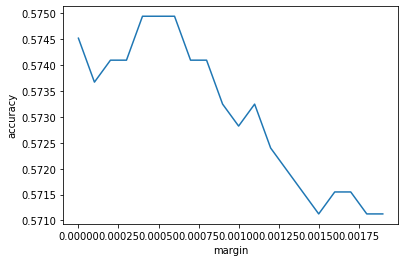

In [96]:
import matplotlib.pyplot as plt

plt.plot(margins, accs)
plt.xlabel('margin')
plt.ylabel('accuracy')

plt.savefig('margins.png')
plt.show()

## Testing for sub-task 2

In [94]:
print('about to load data')
test_data_task2 = task2preprocessing([DRIVE_DIR / TASK_2 / 'test.csv'])
print('loaded test data')

about to load data
loaded test data


In [95]:
MARGIN = 0.0004
test_task2(model1, MARGIN)

0.5472972972972973